In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, brier_score_loss
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

In [2]:
data_section_1_names = ["MTeams.csv" , "WTeams.csv", "MSeasons.csv", "WSeasons.csv",
                        "MNCAATourneySeeds.csv", "WNCAATourneySeeds.csv",
                        "MRegularSeasonCompactResults.csv", "WRegularSeasonCompactResults.csv",
                        "MNCAATourneyCompactResults.csv", "WNCAATourneyCompactResults.csv",
                        "SampleSubmissionStage1.csv"]

In [3]:
folder = os.path.join("data")
data_frames = []

for name in data_section_1_names:
    df = pd.read_csv(os.path.join(folder, name))
    data_frames.append(df)

In [4]:
def analyze_basic_info(df, name):
    """Podstawowa analiza dataframe: kształt, typy danych, brakujące wartości"""
    print(f"\n{'='*80}")
    print(f"ANALIZA ZBIORU DANYCH: {name}")
    print(f"{'='*80}")
    
    print(f"\nKształt: {df.shape} (wierszy, kolumn)")
    
    print("\nPierwsze 5 wierszy:")
    print(df.head().to_string())
    
    print("\nTypy danych:")
    print(df.dtypes)
    
    print("\nInformacje o brakach danych oraz NaN:")
    missing = df.isna().sum() + df.isnull().sum()
    if missing.sum() > 0:
        for col in df.columns:
            if df[col].isna().sum() + df[col].isnull().sum() > 0:
                count = df[col].isna().sum() + df[col].isnull().sum()
                percent = count / len(df) * 100
                print(f"  - {col}: {count} NaN wartości lub missing ({percent:.2f}%)")
    else:
        print("  Brak NaN oraz missing wartości")

In [5]:
def analyze_numerical_stats(df, name):
    """Analiza statystyk dla kolumn numerycznych"""
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    if len(numerical_cols) > 0:
        print("\nStatystyki dla zmiennych numerycznych:")
        stats = df[numerical_cols].describe().T
        stats['missing'] = df[numerical_cols].isna().sum() + df[numerical_cols].isnull().sum()
        stats['missing_percent'] = stats['missing'] / len(df) * 100
        print(stats)

In [6]:
def analyze_categorical_stats(df, name):
    """Analiza statystyk dla kolumn kategorycznych"""
    categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
    
    if len(categorical_cols) > 0:
        print("\nStatystyki dla zmiennych kategorycznych:")
        for col in categorical_cols:
            value_counts = df[col].value_counts()
            unique_count = len(value_counts)
            
            print(f"\n  {col}: {unique_count} unikalnych wartości")
            if unique_count <= 10:  # Jeśli jest mało unikalnych wartości, wyświetl wszystkie
                print(value_counts)
            else:  # W przeciwnym razie pokaż top 10
                print(f"  Top 10 najczęstszych wartości:")
                print(value_counts.head(10))

In [7]:
print("\n\n" + "-"*50)
print("EKSPLORACYJNA ANALIZA DANYCH NCAA")
print("-"*50)


# 1. MTeams.csv - Analiza drużyn męskich
mteams_df = data_frames[0]
analyze_basic_info(mteams_df, "MTeams.csv")
analyze_numerical_stats(mteams_df, "MTeams.csv")
analyze_categorical_stats(mteams_df, "MTeams.csv")

# 2. WTeams.csv - Analiza drużyn żeńskich
wteams_df = data_frames[1]
analyze_basic_info(wteams_df, "WTeams.csv")
analyze_numerical_stats(wteams_df, "WTeams.csv")
analyze_categorical_stats(wteams_df, "WTeams.csv")

# 3. MSeasons.csv - Analiza sezonów męskich
mseasons_df = data_frames[2]
analyze_basic_info(mseasons_df, "MSeasons.csv")
analyze_numerical_stats(mseasons_df, "MSeasons.csv")
analyze_categorical_stats(mseasons_df, "MSeasons.csv")

# 4. WSeasons.csv - Analiza sezonów żeńskich
wseasons_df = data_frames[3]
analyze_basic_info(wseasons_df, "WSeasons.csv")
analyze_numerical_stats(wseasons_df, "WSeasons.csv")
analyze_categorical_stats(wseasons_df, "WSeasons.csv")

# 5. MNCAATourneySeeds.csv - Analiza rozstawień turnieju męskiego
mtourney_seeds_df = data_frames[4]
analyze_basic_info(mtourney_seeds_df, "MNCAATourneySeeds.csv")
analyze_numerical_stats(mtourney_seeds_df, "MNCAATourneySeeds.csv")
analyze_categorical_stats(mtourney_seeds_df, "MNCAATourneySeeds.csv")

# 6. WNCAATourneySeeds.csv - Analiza rozstawień turnieju żeńskiego
wtourney_seeds_df = data_frames[5]
analyze_basic_info(wtourney_seeds_df, "WNCAATourneySeeds.csv")
analyze_numerical_stats(wtourney_seeds_df, "WNCAATourneySeeds.csv")
analyze_categorical_stats(wtourney_seeds_df, "WNCAATourneySeeds.csv")

# 7. MRegularSeasonCompactResults.csv - Analiza wyników sezonu regularnego mężczyzn
mregular_results_df = data_frames[6]
analyze_basic_info(mregular_results_df, "MRegularSeasonCompactResults.csv")
analyze_numerical_stats(mregular_results_df, "MRegularSeasonCompactResults.csv")
analyze_categorical_stats(mregular_results_df, "MRegularSeasonCompactResults.csv")

# 8. WRegularSeasonCompactResults.csv - Analiza wyników sezonu regularnego kobiet
wregular_results_df = data_frames[7]
analyze_basic_info(wregular_results_df, "WRegularSeasonCompactResults.csv")
analyze_numerical_stats(wregular_results_df, "WRegularSeasonCompactResults.csv")
analyze_categorical_stats(wregular_results_df, "WRegularSeasonCompactResults.csv")

# 9. MNCAATourneyCompactResults.csv - Analiza wyników turnieju mężczyzn
mtourney_results_df = data_frames[8]
analyze_basic_info(mtourney_results_df, "MNCAATourneyCompactResults.csv")
analyze_numerical_stats(mtourney_results_df, "MNCAATourneyCompactResults.csv")
analyze_categorical_stats(mtourney_results_df, "MNCAATourneyCompactResults.csv")

# 10. WNCAATourneyCompactResults.csv - Analiza wyników turnieju kobiet
wtourney_results_df = data_frames[9]
analyze_basic_info(wtourney_results_df, "WNCAATourneyCompactResults.csv")
analyze_numerical_stats(wtourney_results_df, "WNCAATourneyCompactResults.csv")
analyze_categorical_stats(wtourney_results_df, "WNCAATourneyCompactResults.csv")

# 11. SampleSubmissionStage1.csv - Analiza przykładowego pliku zgłoszenia
sample_submission_df = data_frames[10]
analyze_basic_info(sample_submission_df, "SampleSubmissionStage1.csv")
analyze_numerical_stats(sample_submission_df, "SampleSubmissionStage1.csv")
analyze_categorical_stats(sample_submission_df, "SampleSubmissionStage1.csv")





--------------------------------------------------
EKSPLORACYJNA ANALIZA DANYCH NCAA
--------------------------------------------------

ANALIZA ZBIORU DANYCH: MTeams.csv

Kształt: (380, 4) (wierszy, kolumn)

Pierwsze 5 wierszy:
   TeamID     TeamName  FirstD1Season  LastD1Season
0    1101  Abilene Chr           2014          2025
1    1102    Air Force           1985          2025
2    1103        Akron           1985          2025
3    1104      Alabama           1985          2025
4    1105  Alabama A&M           2000          2025

Typy danych:
TeamID            int64
TeamName         object
FirstD1Season     int64
LastD1Season      int64
dtype: object

Informacje o brakach danych oraz NaN:
  Brak NaN oraz missing wartości

Statystyki dla zmiennych numerycznych:
               count         mean         std     min      25%     50%  \
TeamID         380.0  1290.500000  109.840794  1101.0  1195.75  1290.5   
FirstD1Season  380.0  1989.618421    9.755814  1985.0  1985.00  1985.0   


Analiza rozkładu punktów w meczach męskich:


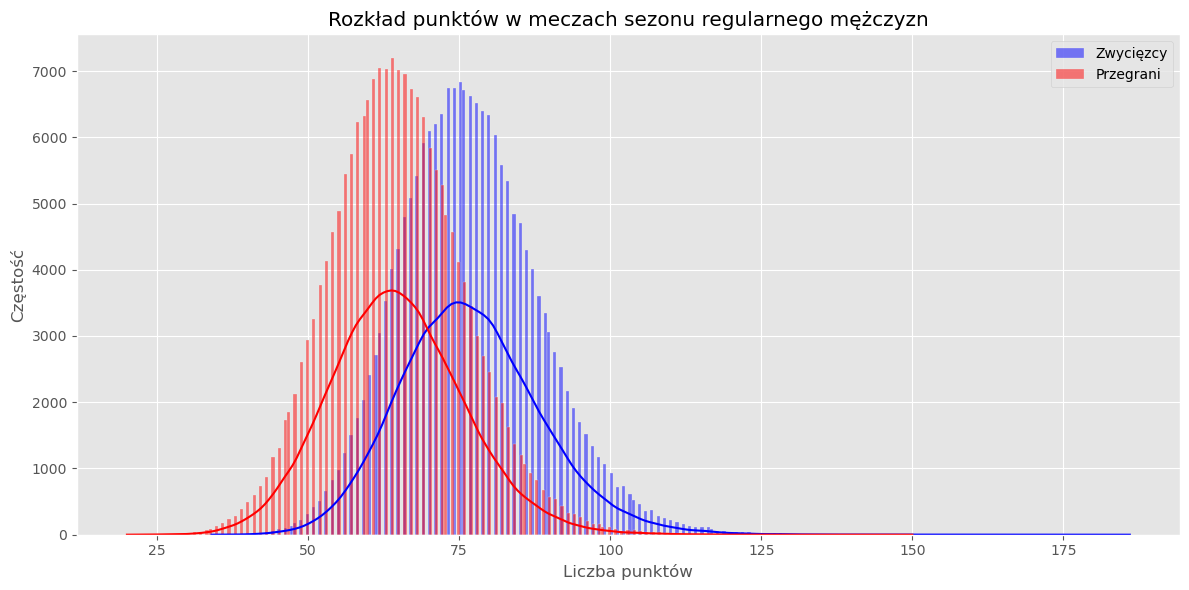


Analiza rozkładu punktów w meczach kobiecych:


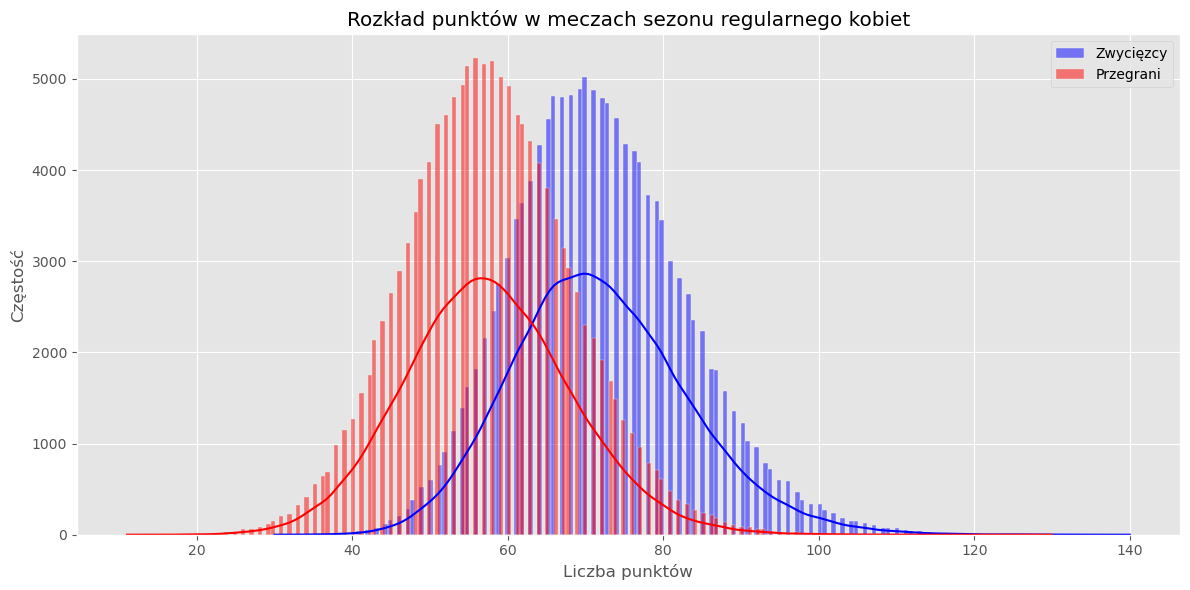

In [8]:
print("\nAnaliza rozkładu punktów w meczach męskich:")
plt.figure(figsize=(12, 6))
sns.histplot(mregular_results_df['WScore'], kde=True, color='blue', label='Zwycięzcy')
sns.histplot(mregular_results_df['LScore'], kde=True, color='red', label='Przegrani')
plt.title('Rozkład punktów w meczach sezonu regularnego mężczyzn')
plt.xlabel('Liczba punktów')
plt.ylabel('Częstość')
plt.legend()
plt.tight_layout()
plt.show()


print("\nAnaliza rozkładu punktów w meczach kobiecych:")
plt.figure(figsize=(12, 6))
sns.histplot(wregular_results_df['WScore'], kde=True, color='blue', label='Zwycięzcy')
sns.histplot(wregular_results_df['LScore'], kde=True, color='red', label='Przegrani')
plt.title('Rozkład punktów w meczach sezonu regularnego kobiet')
plt.xlabel('Liczba punktów')
plt.ylabel('Częstość')
plt.legend()
plt.tight_layout()
plt.show()


Porównanie średnich wyników między mężczyznami i kobietami:
Mężczyźni - średni wynik zwycięzców: 76.86
Mężczyźni - średni wynik przegranych: 64.77
Mężczyźni - średnia różnica punktów: 12.08
Kobiety - średni wynik zwycięzców: 71.92
Kobiety - średni wynik przegranych: 57.52
Kobiety - średnia różnica punktów: 14.41


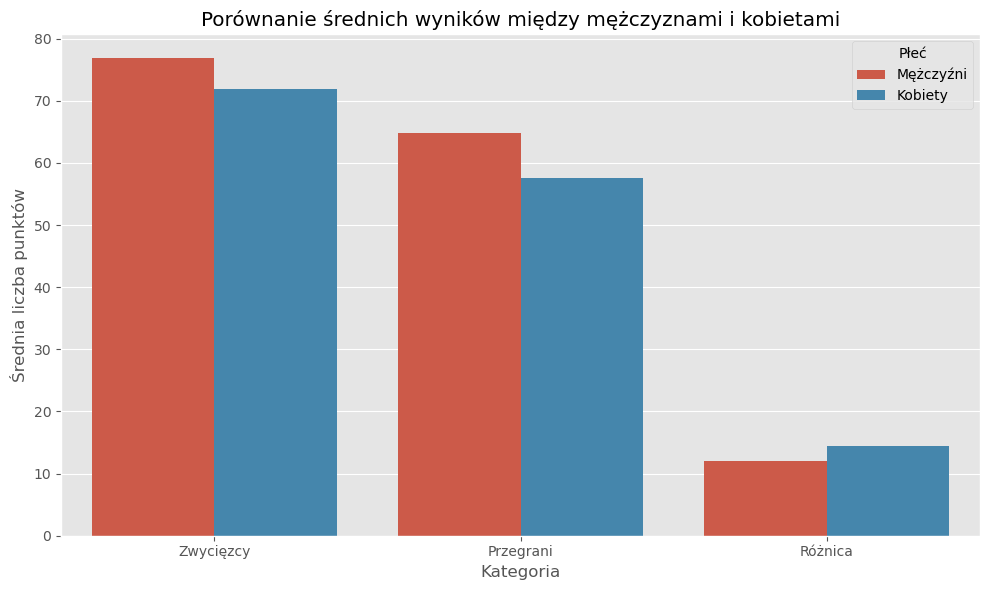

In [9]:
print("\nPorównanie średnich wyników między mężczyznami i kobietami:")
men_avg_w = mregular_results_df['WScore'].mean()
men_avg_l = mregular_results_df['LScore'].mean()
men_diff = men_avg_w - men_avg_l

women_avg_w = wregular_results_df['WScore'].mean()
women_avg_l = wregular_results_df['LScore'].mean()
women_diff = women_avg_w - women_avg_l

print(f"Mężczyźni - średni wynik zwycięzców: {men_avg_w:.2f}")
print(f"Mężczyźni - średni wynik przegranych: {men_avg_l:.2f}")
print(f"Mężczyźni - średnia różnica punktów: {men_diff:.2f}")
print(f"Kobiety - średni wynik zwycięzców: {women_avg_w:.2f}")
print(f"Kobiety - średni wynik przegranych: {women_avg_l:.2f}")
print(f"Kobiety - średnia różnica punktów: {women_diff:.2f}")


# Wykres porównawczy
comparison_data = {
    'Kategoria': ['Zwycięzcy', 'Przegrani', 'Różnica'] * 2,
    'Płeć': ['Mężczyźni'] * 3 + ['Kobiety'] * 3,
    'Średnia': [men_avg_w, men_avg_l, men_diff, women_avg_w, women_avg_l, women_diff]
}
comparison_df = pd.DataFrame(comparison_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Kategoria', y='Średnia', hue='Płeć', data=comparison_df)
plt.title('Porównanie średnich wyników między mężczyznami i kobietami')
plt.ylabel('Średnia liczba punktów')
plt.tight_layout()
plt.show()


Statystyki lokalizacji zwycięzców w meczach męskich:
H    113359
A     58899
N     19538
Name: WLoc, dtype: int64
Procent zwycięstw gospodarzy: 59.10%
Procent zwycięstw gości: 30.71%
Procent zwycięstw na neutralnym boisku: 10.19%


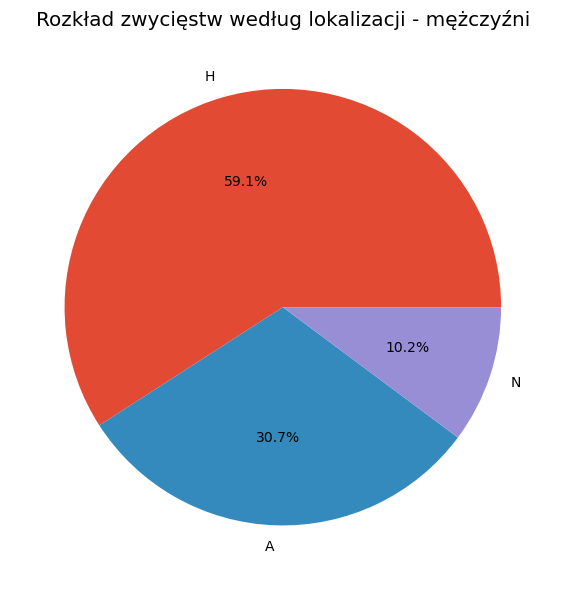

In [10]:
# Analiza przewagi gospodarzy/gości w meczach męskich
print("\nStatystyki lokalizacji zwycięzców w meczach męskich:")
location_stats_m = mregular_results_df['WLoc'].value_counts()
location_percent_m = location_stats_m / len(mregular_results_df) * 100
print(location_stats_m)
print(f"Procent zwycięstw gospodarzy: {location_percent_m.get('H', 0):.2f}%")
print(f"Procent zwycięstw gości: {location_percent_m.get('A', 0):.2f}%")
print(f"Procent zwycięstw na neutralnym boisku: {location_percent_m.get('N', 0):.2f}%")

# Wykres lokalizacji zwycięzców w meczach męskich
plt.figure(figsize=(8, 6))
location_stats_m.plot(kind='pie', autopct='%1.1f%%')
plt.title('Rozkład zwycięstw według lokalizacji - mężczyźni')
plt.ylabel('')
plt.tight_layout()
plt.show()


Statystyki lokalizacji zwycięzców w meczach kobiecych:
H    77117
A    48874
N     9957
Name: WLoc, dtype: int64
Procent zwycięstw gospodarzy: 56.73%
Procent zwycięstw gości: 35.95%
Procent zwycięstw na neutralnym boisku: 7.32%


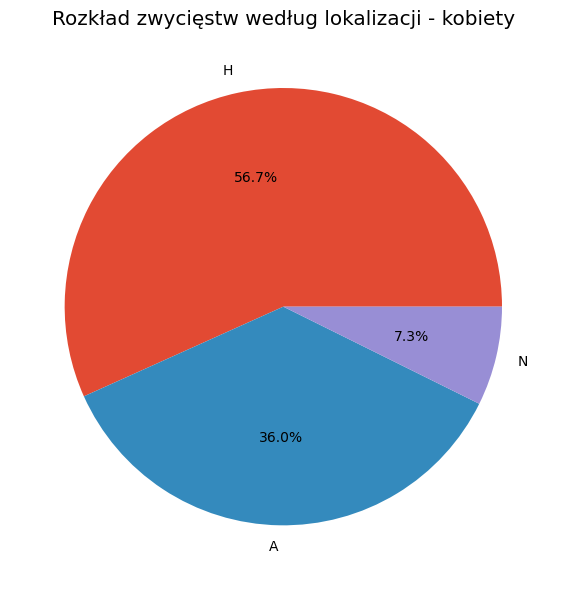

In [11]:
# Analiza przewagi gospodarzy/gości w meczach kobiecych
print("\nStatystyki lokalizacji zwycięzców w meczach kobiecych:")
location_stats_w = wregular_results_df['WLoc'].value_counts()
location_percent_w = location_stats_w / len(wregular_results_df) * 100
print(location_stats_w)
print(f"Procent zwycięstw gospodarzy: {location_percent_w.get('H', 0):.2f}%")
print(f"Procent zwycięstw gości: {location_percent_w.get('A', 0):.2f}%")
print(f"Procent zwycięstw na neutralnym boisku: {location_percent_w.get('N', 0):.2f}%")

# Wykres lokalizacji zwycięzców w meczach kobiecych
plt.figure(figsize=(8, 6))
location_stats_w.plot(kind='pie', autopct='%1.1f%%')
plt.title('Rozkład zwycięstw według lokalizacji - kobiety')
plt.ylabel('')
plt.tight_layout()
plt.show()


Analiza różnicy punktów w meczach:
Średnia różnica punktów (mężczyźni): 12.08
Mediana różnicy punktów (mężczyźni): 10.00
Maksymalna różnica punktów (mężczyźni): 94.00
Średnia różnica punktów (kobiety): 14.41
Mediana różnicy punktów (kobiety): 12.00
Maksymalna różnica punktów (kobiety): 108.00


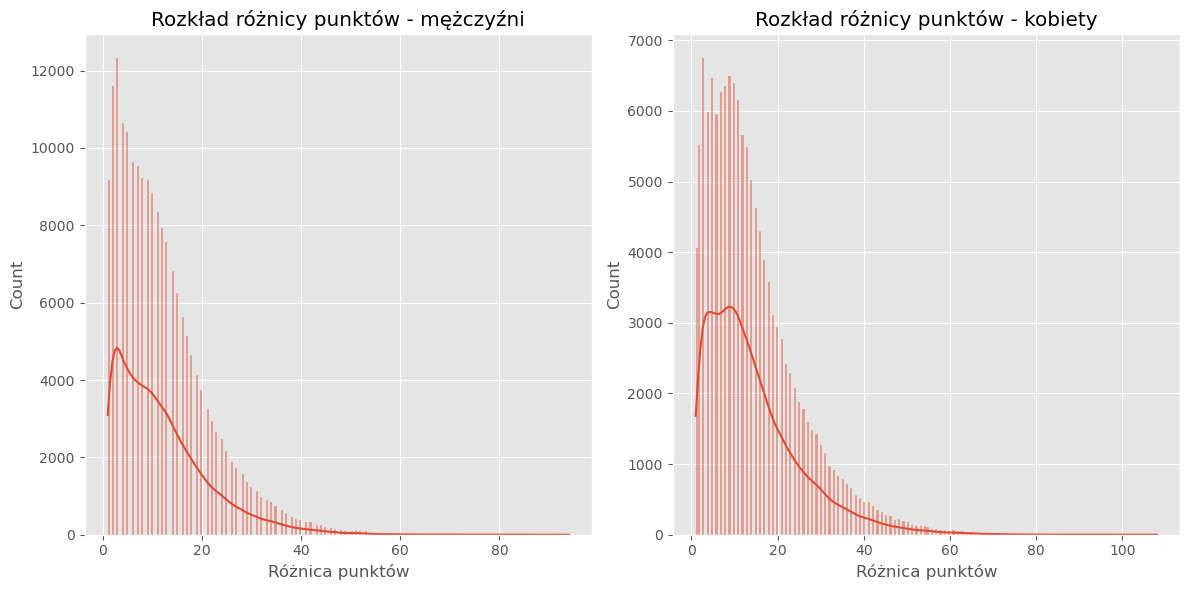

In [12]:
# Analiza różnicy punktów w meczach
print("\nAnaliza różnicy punktów w meczach:")
mregular_results_df['PointDiff'] = mregular_results_df['WScore'] - mregular_results_df['LScore']
wregular_results_df['PointDiff'] = wregular_results_df['WScore'] - wregular_results_df['LScore']

print(f"Średnia różnica punktów (mężczyźni): {mregular_results_df['PointDiff'].mean():.2f}")
print(f"Mediana różnicy punktów (mężczyźni): {mregular_results_df['PointDiff'].median():.2f}")
print(f"Maksymalna różnica punktów (mężczyźni): {mregular_results_df['PointDiff'].max():.2f}")

print(f"Średnia różnica punktów (kobiety): {wregular_results_df['PointDiff'].mean():.2f}")
print(f"Mediana różnicy punktów (kobiety): {wregular_results_df['PointDiff'].median():.2f}")
print(f"Maksymalna różnica punktów (kobiety): {wregular_results_df['PointDiff'].max():.2f}")

# Wykres różnicy punktów
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(mregular_results_df['PointDiff'], kde=True) # gęstość rozkładu
plt.title('Rozkład różnicy punktów - mężczyźni')
plt.xlabel('Różnica punktów')

plt.subplot(1, 2, 2)
sns.histplot(wregular_results_df['PointDiff'], kde=True)
plt.title('Rozkład różnicy punktów - kobiety')
plt.xlabel('Różnica punktów')

plt.tight_layout()
plt.show()


Analiza trendów punktowych przez lata:


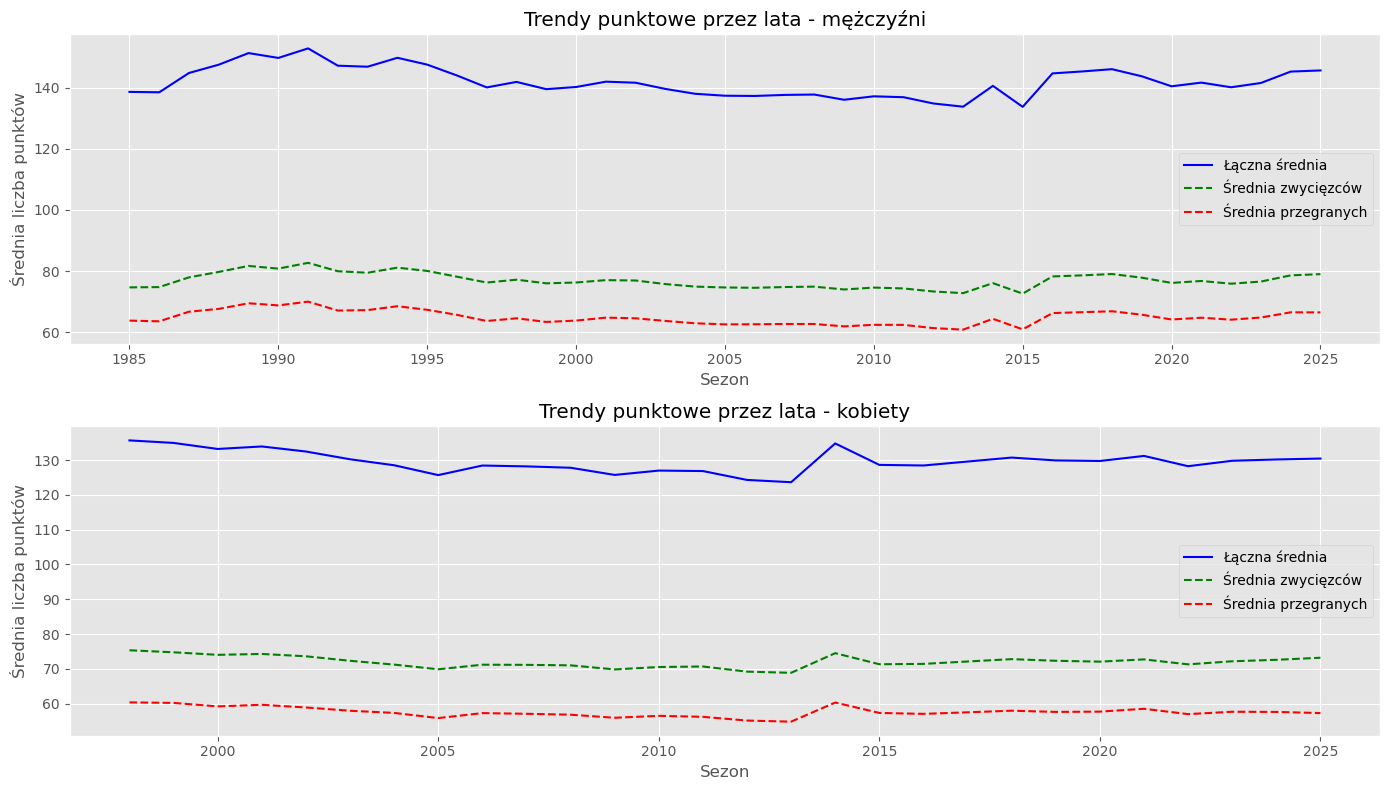

In [13]:
# Analiza trendów punktowych przez lata
print("\nAnaliza trendów punktowych przez lata:")
men_points_by_season = mregular_results_df.groupby('Season').agg({
    'WScore': 'mean',
    'LScore': 'mean'
}).reset_index()
men_points_by_season['AvgTotalPoints'] = men_points_by_season['WScore'] + men_points_by_season['LScore']

women_points_by_season = wregular_results_df.groupby('Season').agg({
    'WScore': 'mean',
    'LScore': 'mean'
}).reset_index()
women_points_by_season['AvgTotalPoints'] = women_points_by_season['WScore'] + women_points_by_season['LScore']

# Wykres trendów punktowych
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.plot(men_points_by_season['Season'], men_points_by_season['AvgTotalPoints'], 'b-', label='Łączna średnia')
plt.plot(men_points_by_season['Season'], men_points_by_season['WScore'], 'g--', label='Średnia zwycięzców')
plt.plot(men_points_by_season['Season'], men_points_by_season['LScore'], 'r--', label='Średnia przegranych')
plt.title('Trendy punktowe przez lata - mężczyźni')
plt.xlabel('Sezon')
plt.ylabel('Średnia liczba punktów')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(women_points_by_season['Season'], women_points_by_season['AvgTotalPoints'], 'b-', label='Łączna średnia')
plt.plot(women_points_by_season['Season'], women_points_by_season['WScore'], 'g--', label='Średnia zwycięzców')
plt.plot(women_points_by_season['Season'], women_points_by_season['LScore'], 'r--', label='Średnia przegranych')
plt.title('Trendy punktowe przez lata - kobiety')
plt.xlabel('Sezon')
plt.ylabel('Średnia liczba punktów')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Analiza wpływu rozstawienia na wyniki turniejowe:

Liczba zwycięstw według rozstawienia (mężczyźni):
1     515
2     363
3     287
4     243
5     180
6     163
7     139
8     111
9      96
10     96
11    122
12     83
13     40
14     26
15     16
16     38
Name: WSeedNumber, dtype: int64

Liczba zwycięstw według rozstawienia (kobiety):
1     400
2     278
3     222
4     181
5     128
6     100
7      92
8      56
9      57
10     42
11     53
12     26
13      8
16      7
Name: WSeedNumber, dtype: int64


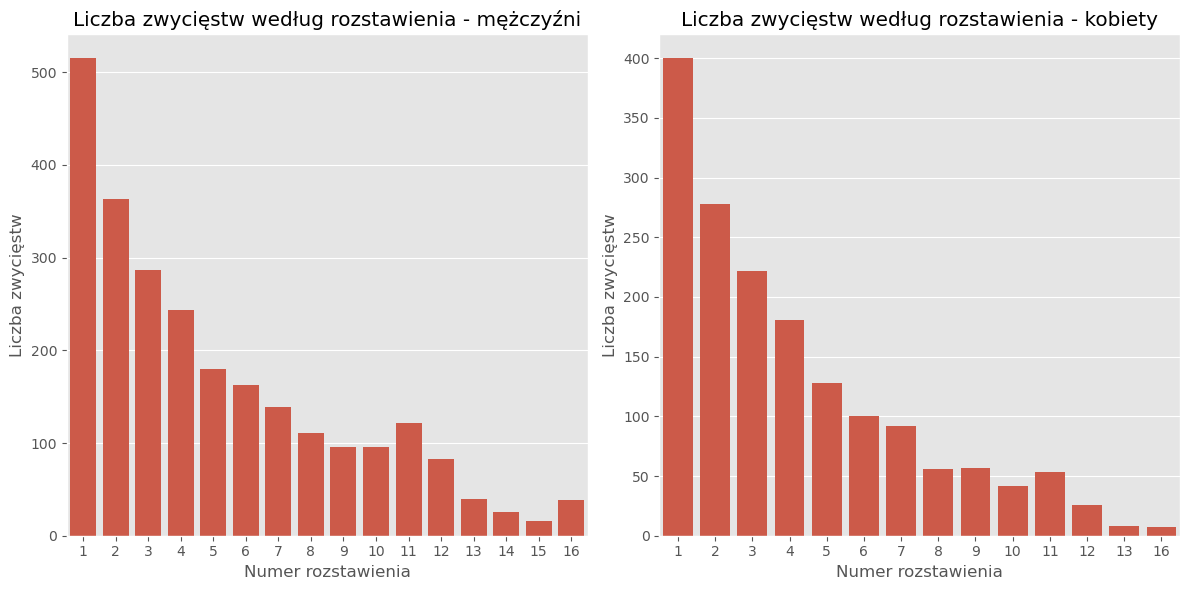

In [14]:
# Analiza wpływu rozstawienia na wyniki turniejowe
print("\nAnaliza wpływu rozstawienia na wyniki turniejowe:")

# Przetwarzanie danych turniejowych - dodanie informacji o rozstawieniu
def extract_seed_number(seed_str):
    """Wyodrębnia numer rozstawienia z ciągu znaków"""
    # Usuń region (W, X, Y, Z) i ewentualny dodatkowy znak (a, b)
    if len(seed_str) > 2:
        return int(seed_str[1:3])
    return None

# Łączenie danych o rozstawieniach z wynikami turniejów
mtourney_seeds_df['SeedNumber'] = mtourney_seeds_df['Seed'].apply(extract_seed_number)
wtourney_seeds_df['SeedNumber'] = wtourney_seeds_df['Seed'].apply(extract_seed_number)

# Tworzenie słowników dla łatwego dostępu do rozstawień
def create_seed_dict(seeds_df):
    seed_dict = {}
    for _, row in seeds_df.iterrows():
        seed_dict[(row['Season'], row['TeamID'])] = row['SeedNumber']
    return seed_dict

mseed_dict = create_seed_dict(mtourney_seeds_df)
wseed_dict = create_seed_dict(wtourney_seeds_df)

# Dodawanie informacji o rozstawieniu do wyników turniejów
mtourney_results_df['WSeedNumber'] = mtourney_results_df.apply(
    lambda row: mseed_dict.get((row['Season'], row['WTeamID']), None), axis=1)
mtourney_results_df['LSeedNumber'] = mtourney_results_df.apply(
    lambda row: mseed_dict.get((row['Season'], row['LTeamID']), None), axis=1)

wtourney_results_df['WSeedNumber'] = wtourney_results_df.apply(
    lambda row: wseed_dict.get((row['Season'], row['WTeamID']), None), axis=1)
wtourney_results_df['LSeedNumber'] = wtourney_results_df.apply(
    lambda row: wseed_dict.get((row['Season'], row['LTeamID']), None), axis=1)

# Analiza liczby zwycięstw według rozstawienia
print("\nLiczba zwycięstw według rozstawienia (mężczyźni):")
mseed_wins = mtourney_results_df['WSeedNumber'].value_counts().sort_index()
print(mseed_wins)

print("\nLiczba zwycięstw według rozstawienia (kobiety):")
wseed_wins = wtourney_results_df['WSeedNumber'].value_counts().sort_index()
print(wseed_wins)

# Wykres liczby zwycięstw według rozstawienia
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=mseed_wins.index, y=mseed_wins.values)
plt.title('Liczba zwycięstw według rozstawienia - mężczyźni')
plt.xlabel('Numer rozstawienia')
plt.ylabel('Liczba zwycięstw')

plt.subplot(1, 2, 2)
sns.barplot(x=wseed_wins.index, y=wseed_wins.values)
plt.title('Liczba zwycięstw według rozstawienia - kobiety')
plt.xlabel('Numer rozstawienia')
plt.ylabel('Liczba zwycięstw')

plt.tight_layout()
plt.show()

In [15]:
# Funkcja do wczytywania danych
def load_data(file_path):
    """Wczytuje dane z pliku CSV."""
    return pd.read_csv(file_path)

# Funkcja do łączenia danych z różnych plików (sezon regularny i turniej NCAA)
def combine_data(regular_season_file, tournament_file):
    """Łączy dane z sezonu regularnego i turnieju."""
    regular_season_data = load_data(regular_season_file)
    regular_season_data['DataType'] = 'Regular Season'  # tworzy nową kolumnę
    
    tournament_data = load_data(tournament_file)
    tournament_data['DataType'] = 'NCAA Tournament'
    
    return pd.concat([regular_season_data, tournament_data], ignore_index=True)

# Funkcja do analizy podstawowych statystyk
def basic_stats_analysis(data):
    """Analiza podstawowych statystyk w danych."""
    # Obliczenie średnich statystyk dla drużyn wygrywających i przegrywających
    winning_stats = data[[col for col in data.columns if col.startswith('W') and col not in ['WTeamID', 'WScore', 'WLoc']]].mean()
    losing_stats = data[[col for col in data.columns if col.startswith('L') and col not in ['LTeamID', 'LScore']]].mean()
    
    # Przekształcenie do formatu DataFrame dla łatwiejszej analizy
    stats_comparison = pd.DataFrame({
        'Winning_Team': winning_stats,
        'Losing_Team': losing_stats
    })
    
    # Dodanie kolumny z różnicą
    stats_comparison['Difference'] = stats_comparison['Winning_Team'] - stats_comparison['Losing_Team']
    stats_comparison['Pct_Difference'] = (stats_comparison['Difference'] / stats_comparison['Losing_Team'] * 100).round(2)
    
    return stats_comparison

# Funkcja do analizy efektywności
def efficiency_analysis(data):
    """Analiza efektywności drużyn."""
    # Obliczenie skuteczności rzutów dla drużyn wygrywających
    data['WFG_Pct'] = (data['WFGM'] / data['WFGA'] * 100).round(2)
    data['W3P_Pct'] = (data['WFGM3'] / data['WFGA3'] * 100).round(2)
    data['WFT_Pct'] = (data['WFTM'] / data['WFTA'] * 100).round(2)
    
    # Obliczenie skuteczności rzutów dla drużyn przegrywających
    data['LFG_Pct'] = (data['LFGM'] / data['LFGA'] * 100).round(2)
    data['L3P_Pct'] = (data['LFGM3'] / data['LFGA3'] * 100).round(2)
    data['LFT_Pct'] = (data['LFTM'] / data['LFTA'] * 100).round(2)
    
    # Obliczenie dodatkowych statystyk efektywności
    data['WPossessions'] = data['WFGA'] + data['WTO'] * 0.96 + data['WFTA'] * 0.44 - data['WOR']
    data['LPossessions'] = data['LFGA'] + data['LTO'] * 0.96 + data['LFTA'] * 0.44 - data['LOR']
    
    data['WOffEff'] = (data['WScore'] / data['WPossessions'] * 100).round(2)
    data['LOffEff'] = (data['LScore'] / data['LPossessions'] * 100).round(2)
    
    # Obliczenie różnicy w posiadaniu piłki
    data['Pace'] = ((data['WPossessions'] + data['LPossessions']) / 2).round(2)
    
    # Analiza efektywności rzutów
    efficiency_stats = pd.DataFrame({
        'Winning_FG_Pct': data['WFG_Pct'].mean(),
        'Losing_FG_Pct': data['LFG_Pct'].mean(),
        'Winning_3P_Pct': data['W3P_Pct'].mean(),
        'Losing_3P_Pct': data['L3P_Pct'].mean(),
        'Winning_FT_Pct': data['WFT_Pct'].mean(),
        'Losing_FT_Pct': data['LFT_Pct'].mean(),
        'Winning_OffEff': data['WOffEff'].mean(),
        'Losing_OffEff': data['LOffEff'].mean(),
        'Avg_Pace': data['Pace'].mean()
    }, index=[0])
    
    return data, efficiency_stats

# Funkcja do analizy trendów czasowych
def time_trend_analysis(data):
    """Analiza trendów czasowych w statystykach."""
    # Grupowanie danych według sezonu
    yearly_stats = data.groupby('Season').agg({
        'WScore': 'mean',
        'LScore': 'mean',
        'WFGA3': 'mean',
        'LFGA3': 'mean',
        'WFG_Pct': 'mean',
        'LFG_Pct': 'mean',
        'W3P_Pct': 'mean',
        'L3P_Pct': 'mean',
        'WOffEff': 'mean',
        'LOffEff': 'mean',
        'Pace': 'mean'
    })
    
    # Dodanie kolumn z całkowitą liczbą punktów i różnicą punktów
    yearly_stats['Total_Points'] = yearly_stats['WScore'] + yearly_stats['LScore']
    yearly_stats['Point_Diff'] = yearly_stats['WScore'] - yearly_stats['LScore']
    yearly_stats['Total_3PA'] = yearly_stats['WFGA3'] + yearly_stats['LFGA3']
    
    return yearly_stats

# Funkcja do analizy korelacji
def correlation_analysis(data):
    """Analiza korelacji między różnymi statystykami."""
    # Wybór kolumn do analizy korelacji
    corr_columns = [
        'WScore', 'LScore', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
        'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF',
        'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
        'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',
        'WFG_Pct', 'W3P_Pct', 'WFT_Pct', 'LFG_Pct', 'L3P_Pct', 'LFT_Pct',
        'WOffEff', 'LOffEff', 'Pace'
    ]
    
    # Obliczenie macierzy korelacji
    correlation_matrix = data[corr_columns].corr()
    
    return correlation_matrix





# Safe division function to handle division by zero
def safe_div(x, y):
    return np.where(y != 0, x / y * 100, 0)  # Return 0% when no attempts





# Funkcja do porównania koszykówki męskiej i żeńskiej
def compare_mens_womens(men_data, women_data):
    """Porównanie statystyk między koszykówką męską i żeńską."""
    # Słownik z podstawowymi statystykami do porównania
    comparison_stats = {
        'avg_score': ('WScore', 'LScore'),
        'fg_pct': ('WFG_Pct', 'LFG_Pct'),
        '3p_pct': ('W3P_Pct', 'L3P_Pct'),
        'ft_pct': ('WFT_Pct', 'LFT_Pct'),
        'rebounds': ('WOR', 'WDR', 'LOR', 'LDR'),
        'assists': ('WAst', 'LAst'),
        'steals': ('WStl', 'LStl'),
        'blocks': ('WBlk', 'LBlk'),
        'turnovers': ('WTO', 'LTO'),
        'fouls': ('WPF', 'LPF'),
        'efficiency': ('WOffEff', 'LOffEff'),
        'pace': ('Pace',)
    }
    
    # Ograniczenie danych mężczyzn do tego samego okresu co dane kobiet
    men_subset = men_data[men_data['Season'] >= women_data['Season'].min()]
    
    # Przygotowanie DataFrame do porównania
    comparison_results = {}
    
    for stat_name, stat_columns in comparison_stats.items():
        men_values = []
        women_values = []
        
        for col in stat_columns:
            if col in men_subset.columns and col in women_data.columns:
                men_values.append(men_subset[col].mean())
                women_values.append(women_data[col].mean())
        
        if men_values and women_values:  # Jeśli obie listy nie są puste
            comparison_results[stat_name] = {
                'Men': np.mean(men_values),
                'Women': np.mean(women_values),
                'Difference': np.mean(men_values) - np.mean(women_values),
                'Pct_Difference': ((np.mean(men_values) - np.mean(women_values)) / np.mean(women_values) * 100).round(2)
            }
    
    return pd.DataFrame(comparison_results).T

# Funkcja do wizualizacji podstawowych statystyk
def visualize_basic_stats(stats_comparison):
    """Wizualizacja podstawowych statystyk."""
    # Wybór najważniejszych statystyk do wizualizacji
    important_stats = ['FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF']
    
    # Przygotowanie danych do wizualizacji
    plot_data = pd.DataFrame()
    
    for stat in important_stats:
        if f'W{stat}' in stats_comparison.index and f'L{stat}' in stats_comparison.index:
            plot_data[stat] = [
                stats_comparison.loc[f'W{stat}', 'Winning_Team'],
                stats_comparison.loc[f'L{stat}', 'Losing_Team']
            ]
    
    # Tworzenie wykresu
    fig, ax = plt.subplots(figsize=(14, 10))
    
    x = np.arange(len(important_stats))
    width = 0.35
    
    ax.bar(x - width/2, plot_data.iloc[0], width, label='Winning Teams')
    ax.bar(x + width/2, plot_data.iloc[1], width, label='Losing Teams')
    
    ax.set_xticks(x)
    ax.set_xticklabels(important_stats)
    ax.set_ylabel('Average Value')
    ax.set_title('Comparison of Key Statistics Between Winning and Losing Teams')
    ax.legend()
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('basic_stats_comparison.png')
    plt.show()
    plt.close()

# Funkcja do wizualizacji efektywności
def visualize_efficiency(efficiency_stats):
    """Wizualizacja statystyk efektywności."""
    # Przygotowanie danych do wizualizacji
    categories = ['FG_Pct', '3P_Pct', 'FT_Pct']
    winning_values = [efficiency_stats['Winning_FG_Pct'][0], efficiency_stats['Winning_3P_Pct'][0], efficiency_stats['Winning_FT_Pct'][0]]
    losing_values = [efficiency_stats['Losing_FG_Pct'][0], efficiency_stats['Losing_3P_Pct'][0], efficiency_stats['Losing_FT_Pct'][0]]
    
    # Tworzenie wykresu
    fig, ax = plt.subplots(figsize=(10, 6))
    
    x = np.arange(len(categories))
    width = 0.35
    
    ax.bar(x - width/2, winning_values, width, label='Winning Teams')
    ax.bar(x + width/2, losing_values, width, label='Losing Teams')
    
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_ylabel('Percentage (%)')
    ax.set_title('Shooting Efficiency Comparison')
    ax.legend()
    
    # Dodanie wartości na wykresie
    for i, v in enumerate(winning_values):
        ax.text(i - width/2, v + 0.5, f"{v:.1f}%", ha='center')
    
    for i, v in enumerate(losing_values):
        ax.text(i + width/2, v + 0.5, f"{v:.1f}%", ha='center')
    
    plt.tight_layout()
    plt.savefig('shooting_efficiency_comparison.png')
    plt.show()
    plt.close()
    
    # Wykres efektywności ofensywnej
    fig, ax = plt.subplots(figsize=(8, 6))
    
    categories = ['Offensive Efficiency']
    winning_values = [efficiency_stats['Winning_OffEff'][0]]
    losing_values = [efficiency_stats['Losing_OffEff'][0]]
    
    x = np.arange(len(categories))
    width = 0.35
    
    ax.bar(x - width/2, winning_values, width, label='Winning Teams')
    ax.bar(x + width/2, losing_values, width, label='Losing Teams')
    
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_ylabel('Points per 100 Possessions')
    ax.set_title('Offensive Efficiency Comparison')
    ax.legend()
    
    # Dodanie wartości na wykresie
    for i, v in enumerate(winning_values):
        ax.text(i - width/2, v + 0.5, f"{v:.1f}", ha='center')
    
    for i, v in enumerate(losing_values):
        ax.text(i + width/2, v + 0.5, f"{v:.1f}", ha='center')
    
    plt.tight_layout()
    plt.savefig('offensive_efficiency_comparison.png')
    plt.show()
    plt.close()

# Funkcja do wizualizacji trendów czasowych
def visualize_time_trends(yearly_stats):
    """Wizualizacja trendów czasowych w statystykach."""
    # Tworzenie wykresu trendów punktowych
    fig, ax = plt.subplots(figsize=(14, 8))
    
    ax.plot(yearly_stats.index, yearly_stats['WScore'], marker='o', label='Winning Team Score')
    ax.plot(yearly_stats.index, yearly_stats['LScore'], marker='s', label='Losing Team Score')
    ax.plot(yearly_stats.index, yearly_stats['Total_Points'], marker='^', label='Total Points')
    
    ax.set_xlabel('Season')
    ax.set_ylabel('Points')
    ax.set_title('Scoring Trends Over Time')
    ax.legend()
    
    # Dodanie siatki
    ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('scoring_trends.png')
    plt.show()
    plt.close()
    
    # Tworzenie wykresu trendów trzypunktowych
    fig, ax = plt.subplots(figsize=(14, 8))
    
    ax.plot(yearly_stats.index, yearly_stats['WFGA3'], marker='o', label='Winning Team 3PA')
    ax.plot(yearly_stats.index, yearly_stats['LFGA3'], marker='s', label='Losing Team 3PA')
    ax.plot(yearly_stats.index, yearly_stats['Total_3PA'], marker='^', label='Total 3PA')
    
    ax.set_xlabel('Season')
    ax.set_ylabel('3-Point Attempts')
    ax.set_title('3-Point Shooting Trends Over Time')
    ax.legend()
    
    # Dodanie siatki
    ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('three_point_trends.png')
    plt.show()
    plt.close()
    
    # Tworzenie wykresu trendów skuteczności
    fig, ax = plt.subplots(figsize=(14, 8))
    
    ax.plot(yearly_stats.index, yearly_stats['WFG_Pct'], marker='o', label='Winning Team FG%')
    ax.plot(yearly_stats.index, yearly_stats['LFG_Pct'], marker='s', label='Losing Team FG%')
    ax.plot(yearly_stats.index, yearly_stats['W3P_Pct'], marker='^', label='Winning Team 3P%')
    ax.plot(yearly_stats.index, yearly_stats['L3P_Pct'], marker='v', label='Losing Team 3P%')
    
    ax.set_xlabel('Season')
    ax.set_ylabel('Percentage (%)')
    ax.set_title('Shooting Efficiency Trends Over Time')
    ax.legend()
    
    # Dodanie siatki
    ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('efficiency_trends.png')
    plt.show()
    plt.close()
    
    # Tworzenie wykresu trendów tempa gry
    fig, ax = plt.subplots(figsize=(14, 8))
    
    ax.plot(yearly_stats.index, yearly_stats['Pace'], marker='o', label='Pace (Possessions per Game)')
    ax.plot(yearly_stats.index, yearly_stats['WOffEff'], marker='s', label='Winning Team Off. Efficiency')
    ax.plot(yearly_stats.index, yearly_stats['LOffEff'], marker='^', label='Losing Team Off. Efficiency')
    
    ax.set_xlabel('Season')
    ax.set_ylabel('Value')
    ax.set_title('Pace and Efficiency Trends Over Time')
    ax.legend()
    
    # Dodanie siatki
    ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('pace_trends.png')
    plt.show()
    plt.close()

# Funkcja do wizualizacji macierzy korelacji
def visualize_correlation(correlation_matrix):
    """Wizualizacja macierzy korelacji między statystykami."""
    # Wybór najważniejszych statystyk do wizualizacji
    important_stats = [
        'WScore', 'LScore', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WOR', 'WDR',
        'WAst', 'WTO', 'WStl', 'WBlk', 'WFG_Pct', 'W3P_Pct', 'WOffEff'
    ]
    
    # Filtrowanie macierzy korelacji
    filtered_corr = correlation_matrix.loc[important_stats, important_stats]
    
    # Tworzenie heatmapy
    plt.figure(figsize=(14, 12))
    sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Key Statistics')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    plt.show()
    plt.close()

# Funkcja do wizualizacji ważności cech w modelu predykcyjnym
def visualize_feature_importance(feature_importance):
    """Wizualizacja ważności cech w modelu predykcyjnym."""
    # Tworzenie wykresu
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Most Important Features for Predicting Game Outcomes')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()
    plt.close()

# Funkcja do wizualizacji porównania koszykówki męskiej i żeńskiej
def visualize_gender_comparison(comparison_df):
    """Wizualizacja porównania koszykówki męskiej i żeńskiej."""
    # Wybór najważniejszych statystyk do wizualizacji
    important_stats = ['avg_score', 'fg_pct', '3p_pct', 'ft_pct', 'rebounds', 'assists', 'steals', 'blocks', 'turnovers', 'pace']
    
    # Filtrowanie danych
    plot_data = comparison_df.loc[important_stats]
    
    # Tworzenie wykresu
    fig, ax = plt.subplots(figsize=(14, 10))
    
    x = np.arange(len(important_stats))
    width = 0.35
    
    ax.bar(x - width/2, plot_data['Men'], width, label='Men')
    ax.bar(x + width/2, plot_data['Women'], width, label='Women')
    
    ax.set_xticks(x)
    ax.set_xticklabels(important_stats)
    ax.set_ylabel('Value')
    ax.set_title('Comparison of Key Statistics Between Men\'s and Women\'s Basketball')
    ax.legend()
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('gender_comparison.png')
    plt.show()
    plt.close()

In [16]:
def predictive_model(data):
    """Budowa modelu predykcyjnego do przewidywania zwycięzcy."""
    # Przygotowanie danych - utworzenie nowego DataFrame z perspektywy obu drużyn
    model_data = []
    
    for _, row in data.iterrows():
        # Statystyki pierwszej drużyny (oznaczonej jako Team1)
        team1_stats = {
            'Season': row['Season'],
            'Team1ID': row['WTeamID'],
            'Team2ID': row['LTeamID'],
            'Team1Score': row['WScore'],
            'Team2Score': row['LScore'],
            'ScoreDiff': row['WScore'] - row['LScore'],
            'Team1FGM': row['WFGM'],
            'Team1FGA': row['WFGA'],
            'Team1FGM3': row['WFGM3'],
            'Team1FGA3': row['WFGA3'],
            'Team1FTM': row['WFTM'],
            'Team1FTA': row['WFTA'],
            'Team1OR': row['WOR'],
            'Team1DR': row['WDR'],
            'Team1Ast': row['WAst'],
            'Team1TO': row['WTO'],
            'Team1Stl': row['WStl'],
            'Team1Blk': row['WBlk'],
            'Team1PF': row['WPF'],
            'Team2FGM': row['LFGM'],
            'Team2FGA': row['LFGA'],
            'Team2FGM3': row['LFGM3'],
            'Team2FGA3': row['LFGA3'],
            'Team2FTM': row['LFTM'],
            'Team2FTA': row['LFTA'],
            'Team2OR': row['LOR'],
            'Team2DR': row['LDR'],
            'Team2Ast': row['LAst'],
            'Team2TO': row['LTO'],
            'Team2Stl': row['LStl'],
            'Team2Blk': row['LBlk'],
            'Team2PF': row['LPF'],
            'Result': 1  # Team1 wygrywa
        }
        model_data.append(team1_stats)
        
        # Statystyki drugiej drużyny (oznaczonej jako Team2) - zamiana statystyk
        team2_stats = {
            'Season': row['Season'],
            'Team1ID': row['LTeamID'],
            'Team2ID': row['WTeamID'],
            'Team1Score': row['LScore'],
            'Team2Score': row['WScore'],
            'ScoreDiff': row['LScore'] - row['WScore'],
            'Team1FGM': row['LFGM'],
            'Team1FGA': row['LFGA'],
            'Team1FGM3': row['LFGM3'],
            'Team1FGA3': row['LFGA3'],
            'Team1FTM': row['LFTM'],
            'Team1FTA': row['LFTA'],
            'Team1OR': row['LOR'],
            'Team1DR': row['LDR'],
            'Team1Ast': row['LAst'],
            'Team1TO': row['LTO'],
            'Team1Stl': row['LStl'],
            'Team1Blk': row['LBlk'],
            'Team1PF': row['LPF'],
            'Team2FGM': row['WFGM'],
            'Team2FGA': row['WFGA'],
            'Team2FGM3': row['WFGM3'],
            'Team2FGA3': row['WFGA3'],
            'Team2FTM': row['WFTM'],
            'Team2FTA': row['WFTA'],
            'Team2OR': row['WOR'],
            'Team2DR': row['WDR'],
            'Team2Ast': row['WAst'],
            'Team2TO': row['WTO'],
            'Team2Stl': row['WStl'],
            'Team2Blk': row['WBlk'],
            'Team2PF': row['WPF'],
            'Result': 0  # Team2 przegrywa
        }
        model_data.append(team2_stats)
    
    model_df = pd.DataFrame(model_data)
    
    # Safe division function to handle division by zero
    def safe_div(x, y):
        return np.where(y != 0, x / y * 100, 0)  # Return 0% when no attempts
    
    # Dodanie kolumn z efektywnością używając bezpiecznej funkcji dzielenia
    model_df['Team1FG_Pct'] = safe_div(model_df['Team1FGM'], model_df['Team1FGA']).round(2)
    model_df['Team13P_Pct'] = safe_div(model_df['Team1FGM3'], model_df['Team1FGA3']).round(2)
    model_df['Team1FT_Pct'] = safe_div(model_df['Team1FTM'], model_df['Team1FTA']).round(2)
    
    model_df['Team2FG_Pct'] = safe_div(model_df['Team2FGM'], model_df['Team2FGA']).round(2)
    model_df['Team23P_Pct'] = safe_div(model_df['Team2FGM3'], model_df['Team2FGA3']).round(2)
    model_df['Team2FT_Pct'] = safe_div(model_df['Team2FTM'], model_df['Team2FTA']).round(2)
    
    # Wybór cech do modelu
    features = [
        'Team1FG_Pct', 'Team13P_Pct', 'Team1FT_Pct', 'Team1OR', 'Team1DR',
        'Team1Ast', 'Team1TO', 'Team1Stl', 'Team1Blk', 'Team1PF',
        'Team2FG_Pct', 'Team23P_Pct', 'Team2FT_Pct', 'Team2OR', 'Team2DR',
        'Team2Ast', 'Team2TO', 'Team2Stl', 'Team2Blk', 'Team2PF'
    ]
    
    X = model_df[features]
    y = model_df['Result']
    
    # Podział danych na zbiór treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Normalizacja danych
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Trenowanie modelu
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    
    # Predykcja na zbiorze testowym
    y_pred_proba = rf_model.predict_proba(X_test_scaled)
    y_pred = rf_model.predict(X_test_scaled)
    
    # Ocena modelu
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    brier = brier_score_loss(y_test, y_pred_proba[:, 1])
    
    # Ważność cech
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    return accuracy, report, brier, feature_importance, rf_model, scaler, features



Loading and combining men's basketball data...
Loading and combining women's basketball data...
Analyzing basic statistics...

Men's Basic Statistics Comparison:
       Winning_Team  Losing_Team  Difference  Pct_Difference
LAst            NaN    11.409997         NaN             NaN
LBlk            NaN     2.869076         NaN             NaN
LDR             NaN    21.622337         NaN             NaN
LFGA            NaN    56.800134         NaN             NaN
LFGA3           NaN    20.166474         NaN             NaN
LFGM            NaN    22.804466         NaN             NaN
LFGM3           NaN     6.210577         NaN             NaN
LFTA            NaN    17.717762         NaN             NaN
LFTM            NaN    12.067221         NaN             NaN
LOR             NaN    10.464081         NaN             NaN
LPF             NaN    19.297666         NaN             NaN
LStl            NaN     6.001074         NaN             NaN
LTO             NaN    13.866239         NaN 

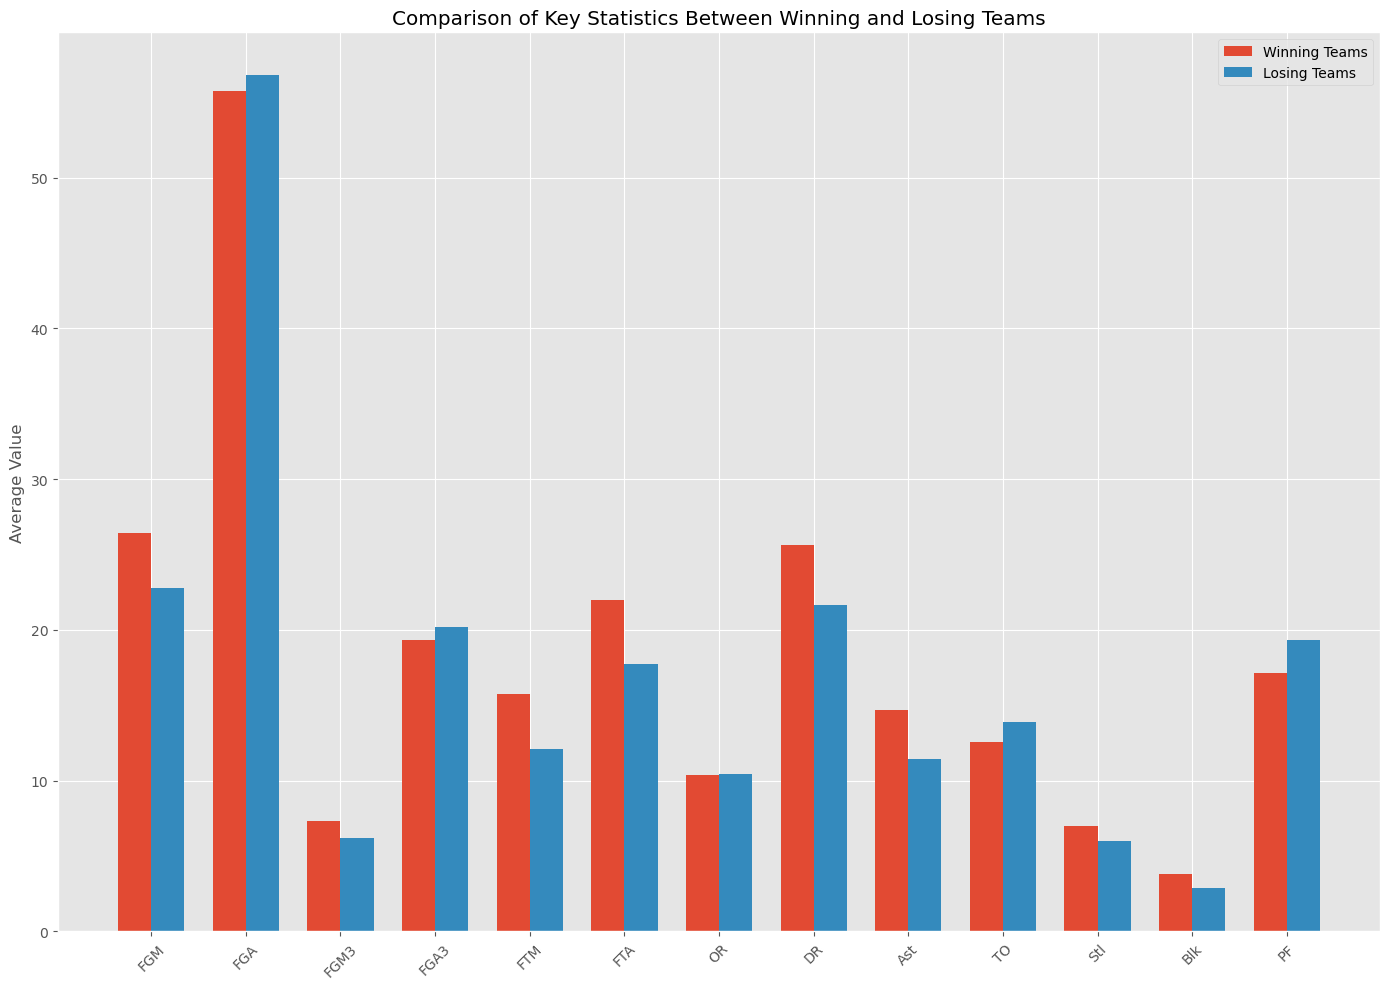

Analyzing efficiency...

Men's Efficiency Statistics:
   Winning_FG_Pct  Losing_FG_Pct  Winning_3P_Pct  Losing_3P_Pct  \
0       47.488617      40.270451        37.89155      30.605198   

   Winning_FT_Pct  Losing_FT_Pct  Winning_OffEff  Losing_OffEff   Avg_Pace  
0       71.470555      67.923684      113.060742      94.705456  67.288632  
Visualizing efficiency...


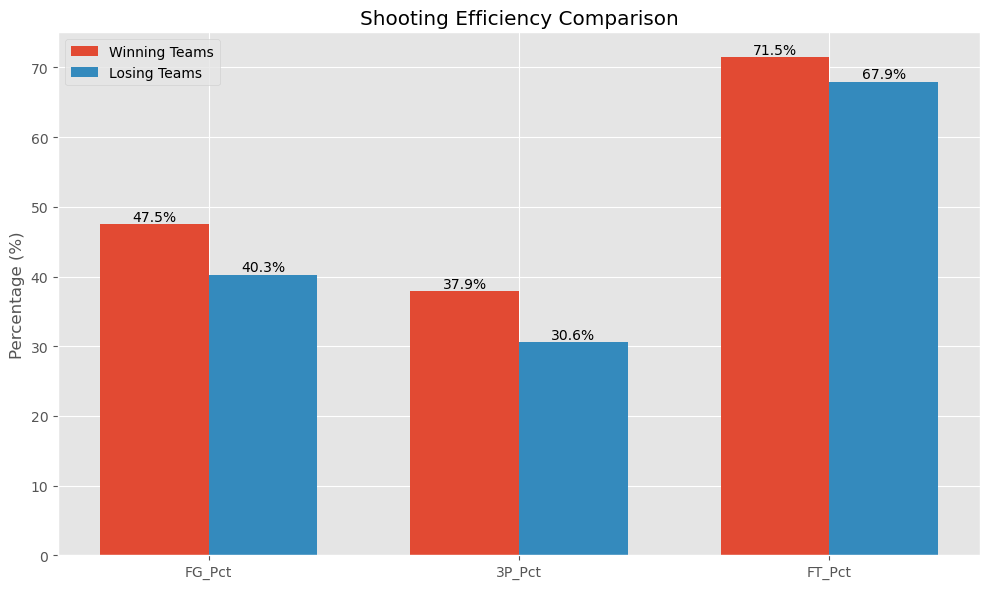

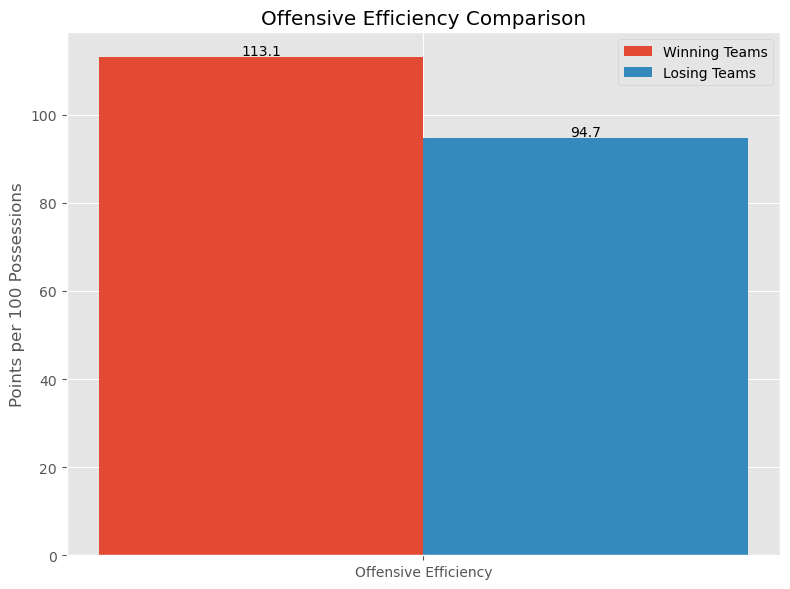

Analyzing time trends...

Men's Yearly Statistics:
           WScore     LScore      WFGA3      LFGA3    WFG_Pct    LFG_Pct  \
Season                                                                     
2003    75.805556  63.781410  17.362179  18.738034  47.667838  40.360282   
2004    74.978425  63.007767  17.569364  18.847896  47.264716  40.236686   
2005    74.705423  62.672294  17.683055  18.933108  47.466113  40.186784   
2006    74.569177  62.673304  17.824103  18.895665  47.381568  40.354153   
2007    74.840415  62.771882  18.141962  19.460153  47.922377  40.376145   

          W3P_Pct    L3P_Pct     WOffEff    LOffEff       Pace  Total_Points  \
Season                                                                         
2003    38.470724  31.001981  112.065735  93.991457  67.764444    139.586966   
2004    38.163161  30.812516  111.662104  93.488488  67.295223    137.986192   
2005    38.162351  30.938000  111.962380  93.595248  66.878303    137.377717   
2006    38.23498

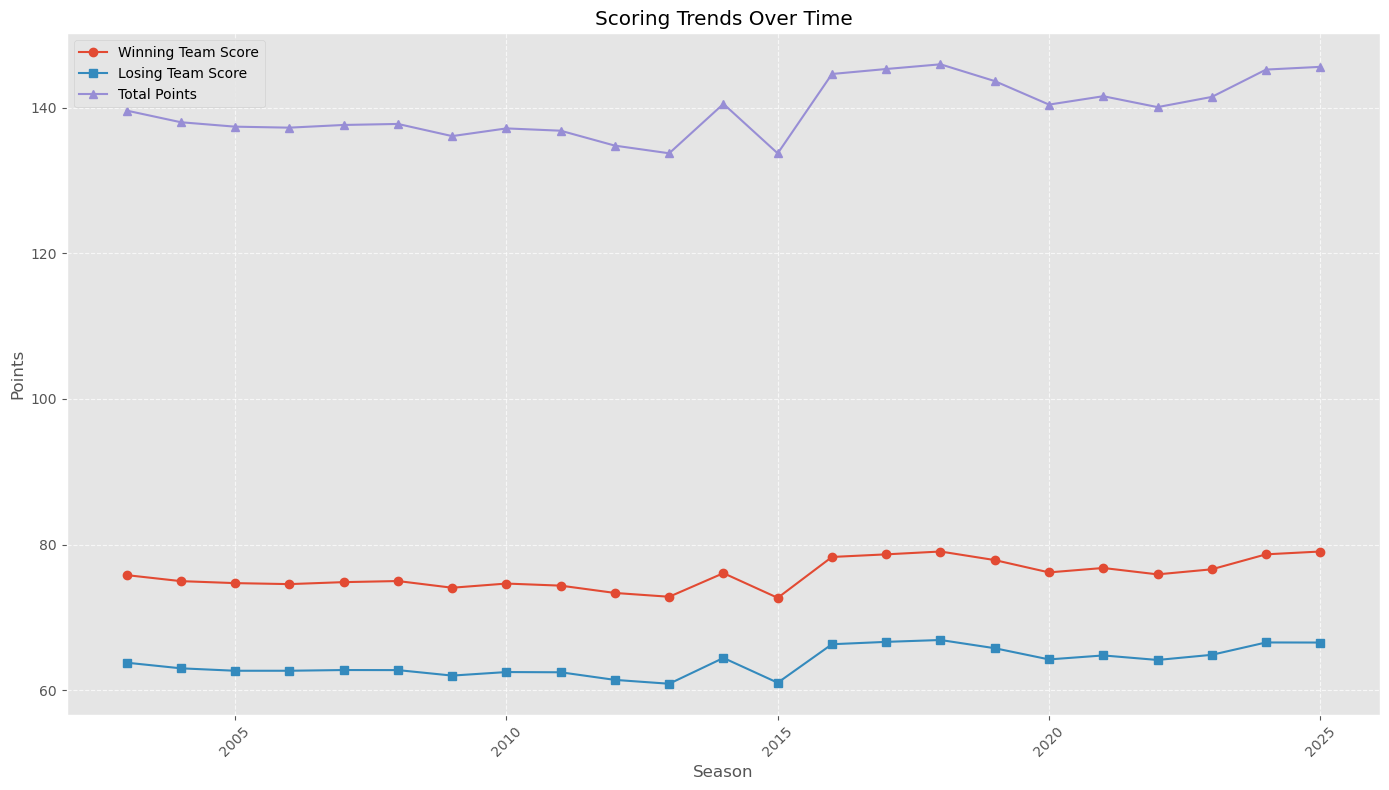

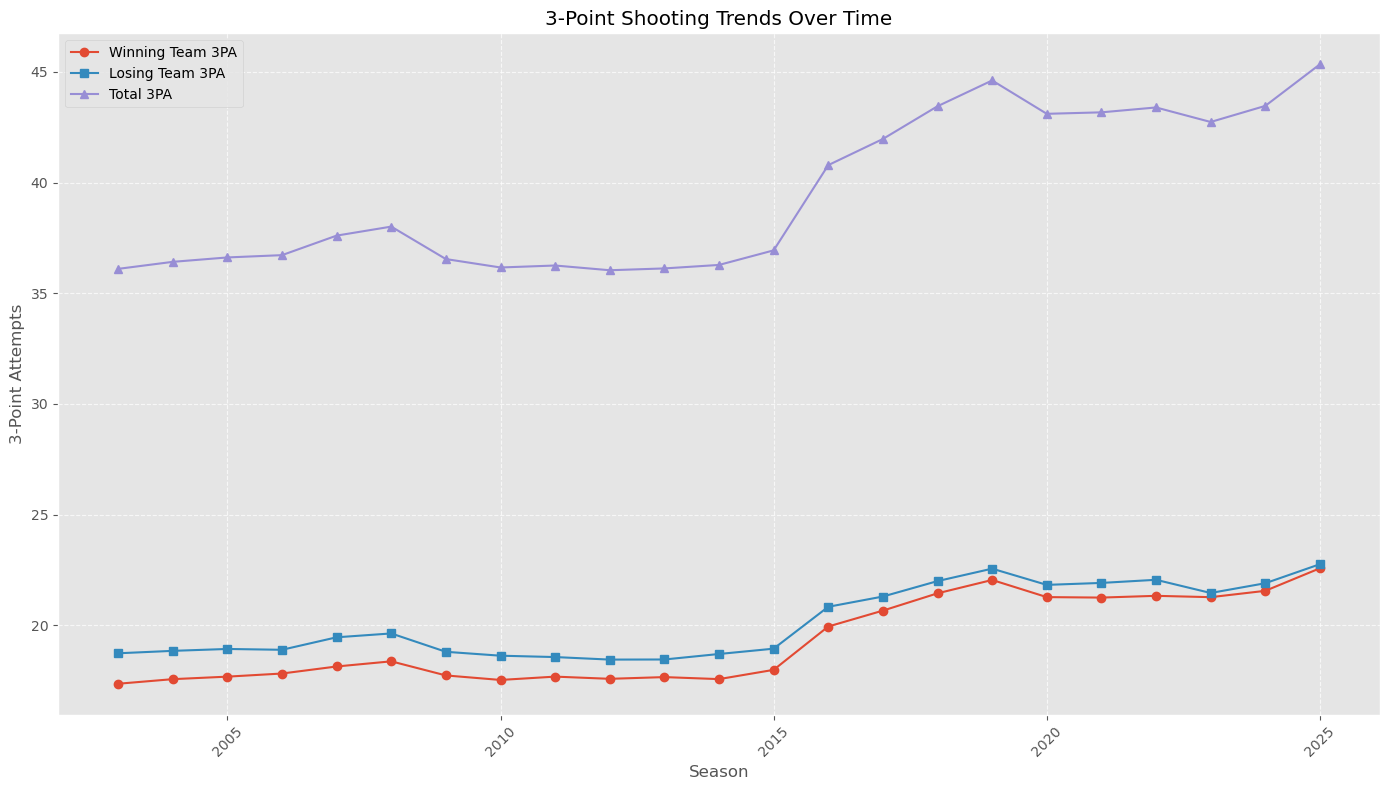

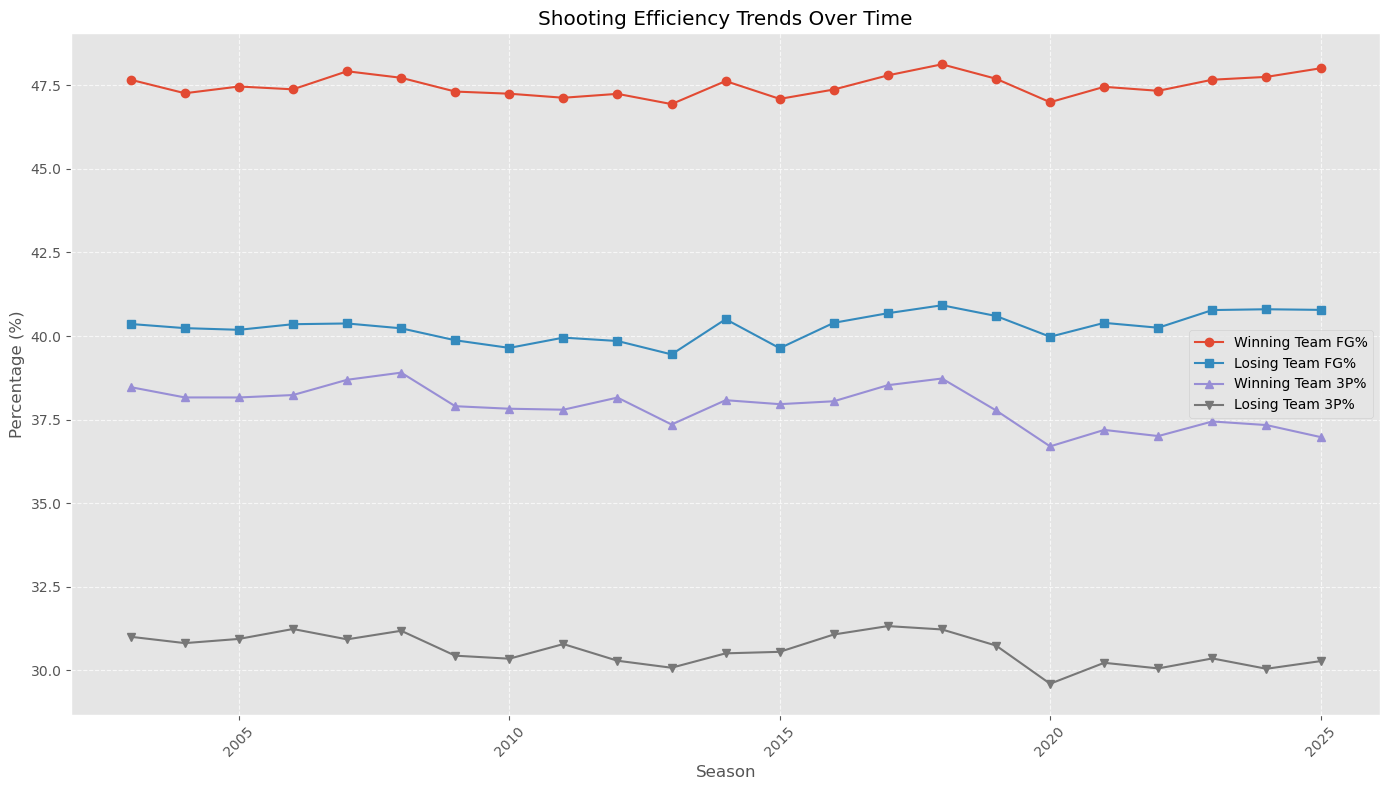

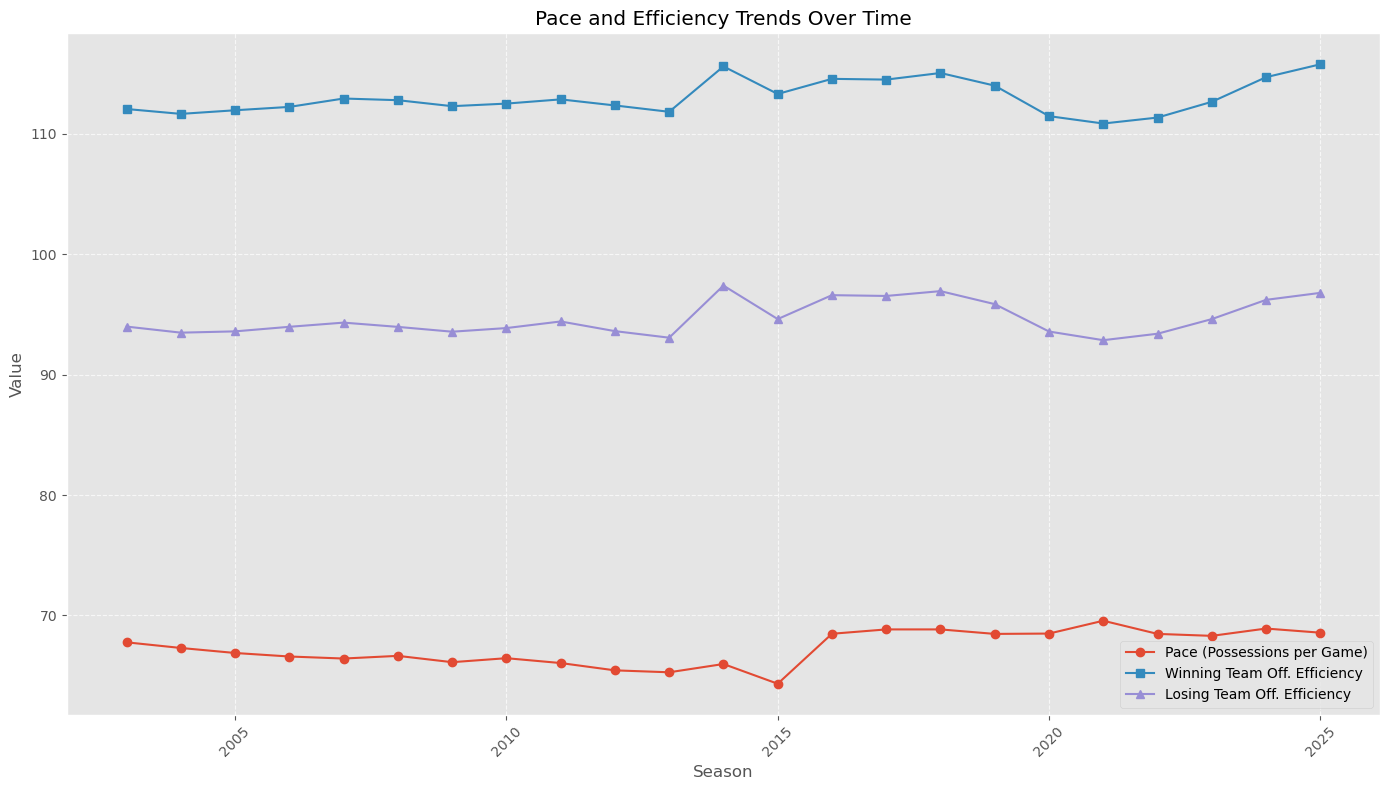

Analyzing correlations...
Visualizing correlations...


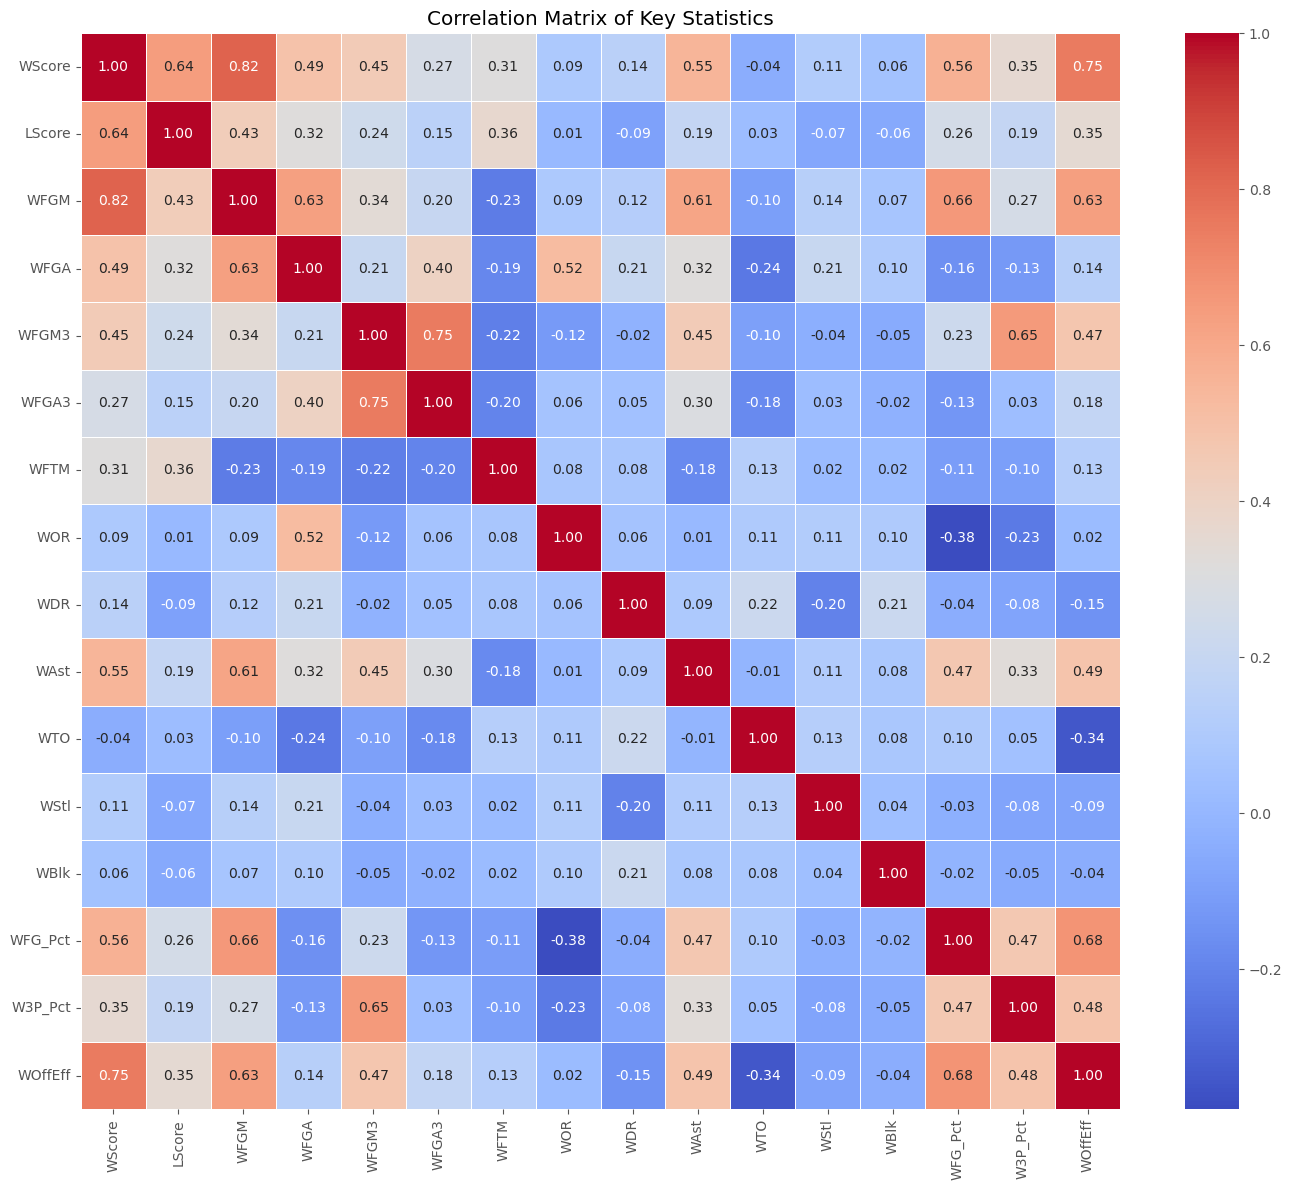

Building predictive model...

Model Accuracy: 0.9228

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     23745
           1       0.93      0.92      0.92     23907

    accuracy                           0.92     47652
   macro avg       0.92      0.92      0.92     47652
weighted avg       0.92      0.92      0.92     47652

Brier score: 0.0657
Visualizing feature importance...


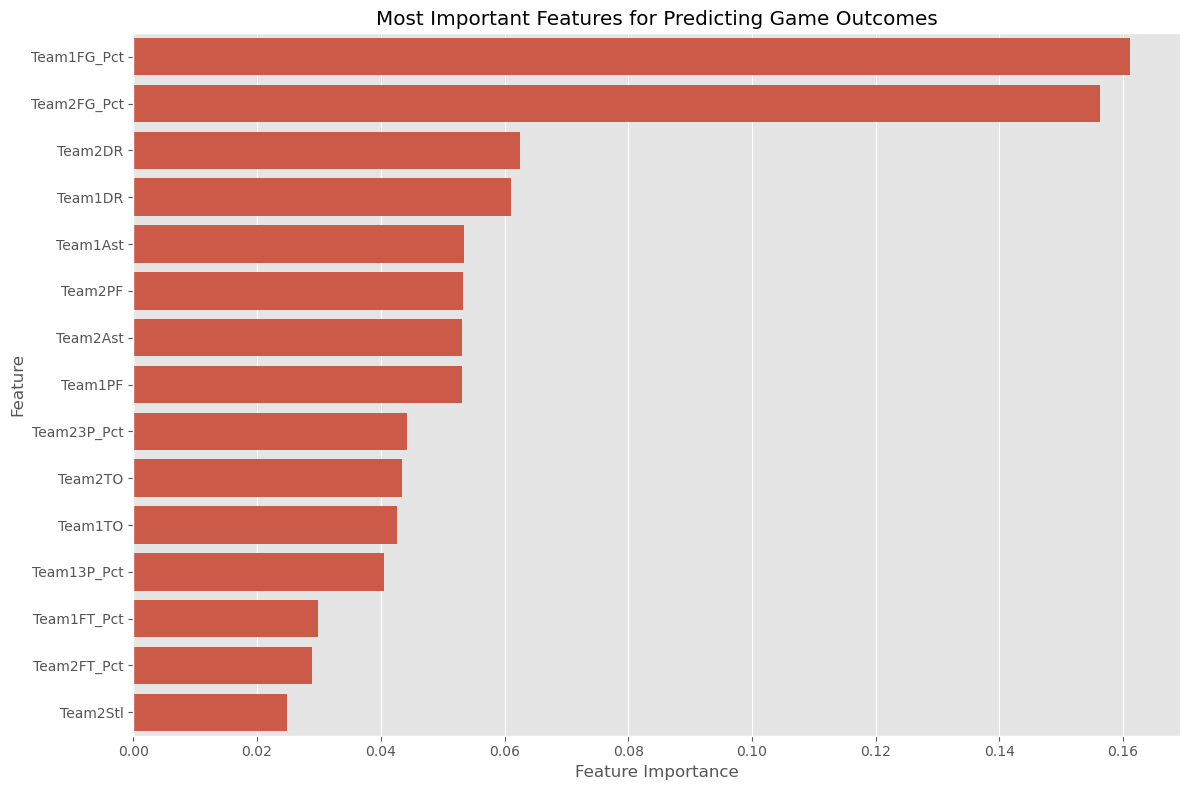

Comparing men's and women's basketball...

Gender Comparison:
                   Men      Women  Difference  Pct_Difference
avg_score    70.314503  64.511218    5.803285            9.00
fg_pct       43.878280  40.040157    3.838123            9.59
3p_pct       34.085718  31.066329    3.019390            9.72
ft_pct       70.111317  69.554423    0.556894            0.80
rebounds     16.926490  18.139843   -1.213353           -6.69
assists      12.930940  12.958660   -0.027720           -0.21
steals        6.319349   7.868413   -1.549063          -19.69
blocks        3.353471   3.256170    0.097301            2.99
turnovers    12.671710  16.075356   -3.403646          -21.17
fouls        18.026948  17.114230    0.912718            5.33
efficiency  104.213698  92.317551   11.896147           12.89
pace         67.491322  69.877829   -2.386508           -3.42
Visualizing gender comparison...


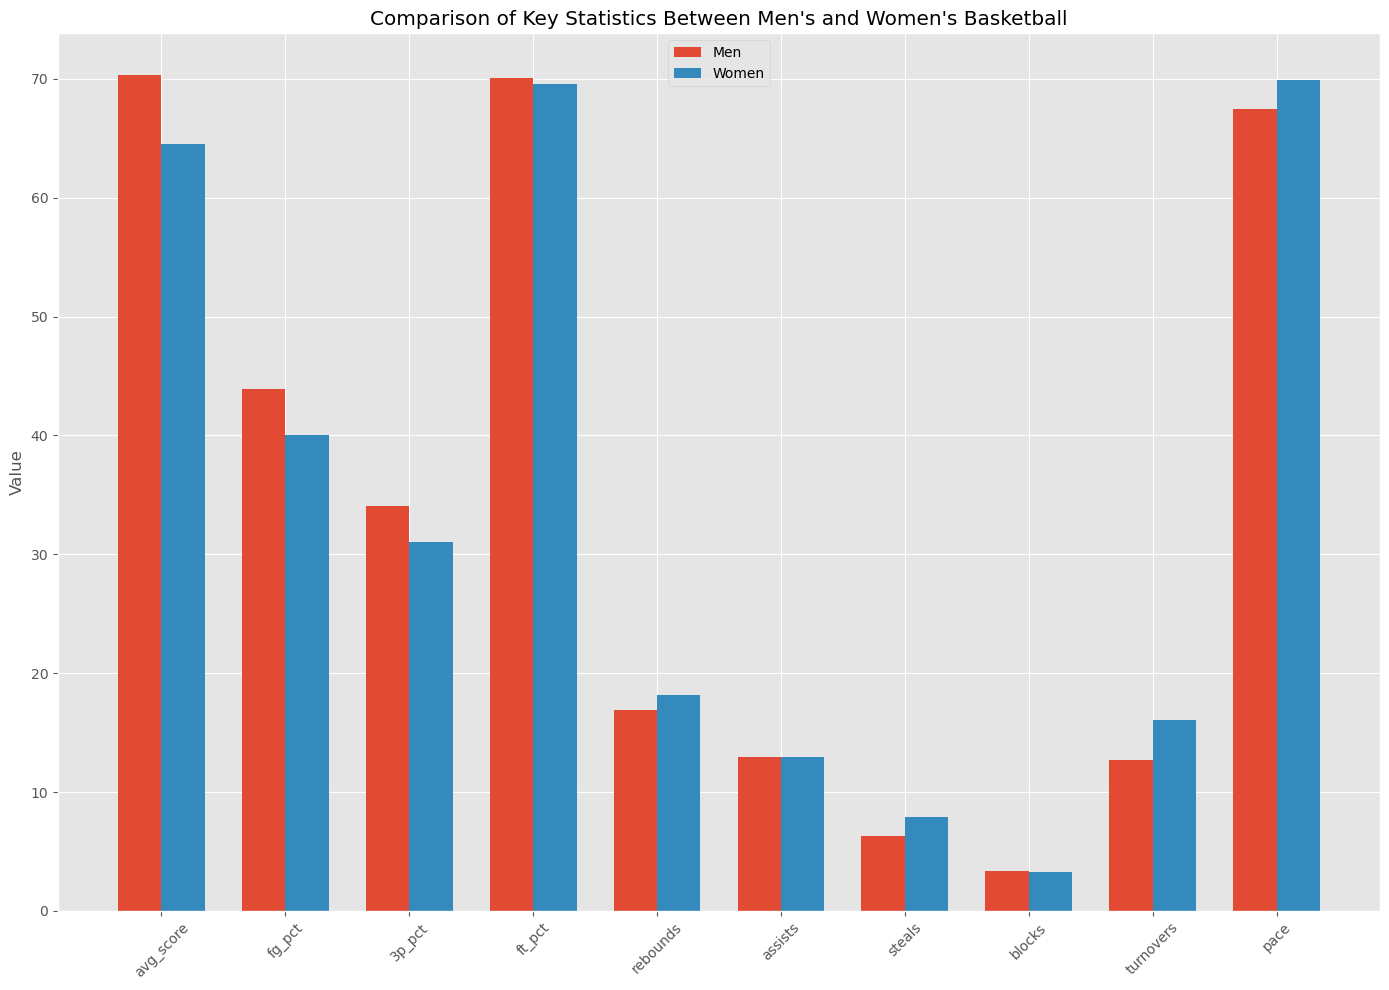

All analyses and visualizations completed!


In [17]:
men_regular_season_file = "data\MRegularSeasonDetailedResults.csv"
men_tournament_file = "data\MNCAATourneyDetailedResults.csv"
women_regular_season_file = "data\WRegularSeasonDetailedResults.csv"
women_tournament_file = "data\WNCAATourneyDetailedResults.csv"
    
# Combine data
print("Loading and combining men's basketball data...")
men_data = combine_data(men_regular_season_file, men_tournament_file)
    
print("Loading and combining women's basketball data...")
women_data = combine_data(women_regular_season_file, women_tournament_file)
    
# Analyze basic statistics
print("Analyzing basic statistics...")
men_stats_comparison = basic_stats_analysis(men_data)
print("\nMen's Basic Statistics Comparison:")
print(men_stats_comparison)
    
# Visualize basic statistics
print("Visualizing basic statistics...")
visualize_basic_stats(men_stats_comparison)
    
# Analyze efficiency
print("Analyzing efficiency...")
men_data, men_efficiency_stats = efficiency_analysis(men_data)
print("\nMen's Efficiency Statistics:")
print(men_efficiency_stats)
    
# Visualize efficiency
print("Visualizing efficiency...")
visualize_efficiency(men_efficiency_stats)
    
# Analyze time trends
print("Analyzing time trends...")
men_yearly_stats = time_trend_analysis(men_data)
print("\nMen's Yearly Statistics:")
print(men_yearly_stats.head())
    
# Visualize time trends
print("Visualizing time trends...")
visualize_time_trends(men_yearly_stats)
    
# Analyze correlations
print("Analyzing correlations...")
men_correlation_matrix = correlation_analysis(men_data)
    
# Visualize correlations
print("Visualizing correlations...")
visualize_correlation(men_correlation_matrix)
    
# Build predictive model
print("Building predictive model...")
accuracy, report, brier, feature_importance, rf_model, scaler, features = predictive_model(men_data)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

print(f"Brier score: {brier:.4f}")

# Visualize feature importance
print("Visualizing feature importance...")
visualize_feature_importance(feature_importance)
    
# Compare men's and women's basketball
print("Comparing men's and women's basketball...")
women_data, women_efficiency_stats = efficiency_analysis(women_data)
gender_comparison = compare_mens_womens(men_data, women_data)
print("\nGender Comparison:")
print(gender_comparison)
    
# Visualize gender comparison
print("Visualizing gender comparison...")
visualize_gender_comparison(gender_comparison)
    
print("All analyses and visualizations completed!")
    
# Display all plots
plt.show()